In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [2]:
# Define path
path = r'/Users/Shikongo/Healthcare Cost Analysis and Prediction/'

In [3]:
path

'/Users/Shikongo/Healthcare Cost Analysis and Prediction/'

In [4]:
df_insurance = pd.read_csv(r'/Users/Shikongo/Healthcare Cost Analysis and Prediction/Healthcare Clean Data/ Clean Data/insurance2.csv',index_col = False)

In [6]:
df_insurance.to_csv(os.path.join(path,'Healthcare Clean Data',' Clean Data','insurance2.csv'))

In [7]:
# Create new variable with values 1 = Female & 0 = Male
df_insurance['Sex_Dummy'] = pd.get_dummies(df_insurance['Sex'])['female']

In [8]:
# Create new variable with values 1 = Female & 0 = Male
df_insurance['Smoker_Dummy'] = pd.get_dummies(df_insurance['Smoker'])['yes']

In [9]:
# Remove dollar sign to the value
df_insurance['Charges'] = df_insurance['Charges'].astype(str).str.replace('$', '')

/var/folders/wt/9ylmxnkx64q1nt52gjn4j_bw0000gp/T/ipykernel_70825/3071307583.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_insurance['Charges'] = df_insurance['Charges'].astype(str).str.replace('$', '')


In [10]:
# Convert 'Charges' to a numeric data type
df_insurance['Charges'] = pd.to_numeric(df_insurance['Charges'])

In [11]:
df_insurance.head()

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Age,Sex,BMI,Children,Smoker,Region,Charges,Sex_Dummy,Smoker_Dummy
0,0,0,0,0,0,19,female,27.900,0,yes,southwest,16884.92400,1,1
1,1,1,1,1,1,18,male,33.770,1,no,southeast,1725.55230,0,0
2,2,2,2,2,2,28,male,33.000,3,no,southeast,4449.46200,0,0
3,3,3,3,3,3,33,male,22.705,0,no,northwest,21984.47061,0,0
4,4,4,4,4,4,32,male,28.880,0,no,northwest,3866.85520,0,0


1. Create a correlation matrix heatmap (colored)
Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

In [12]:
# Compute the correlation matrix
corr_matrix = df_insurance.corr()

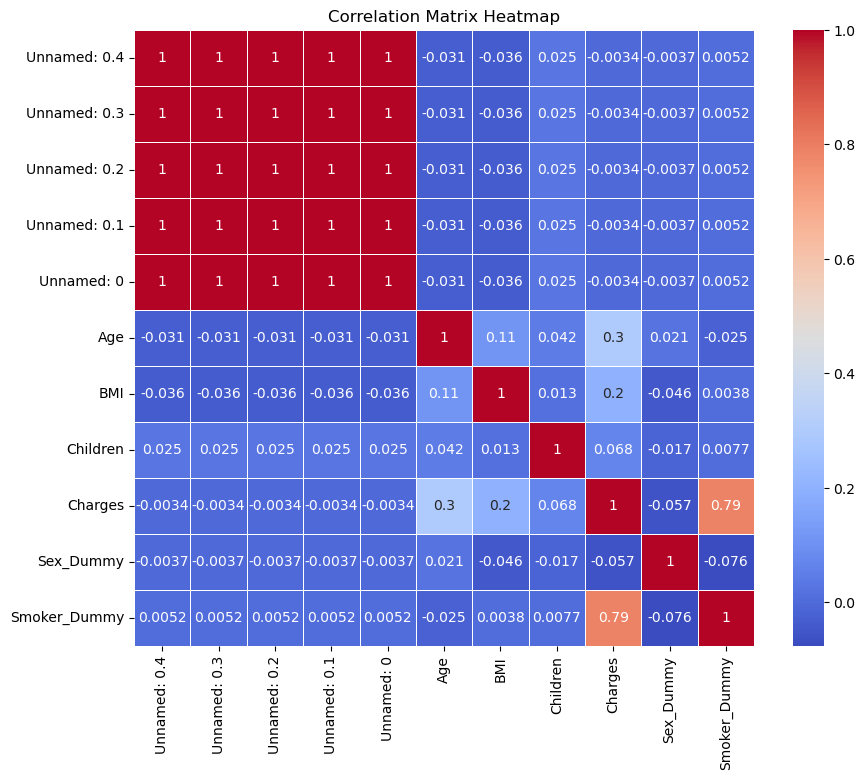

In [13]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Interpretation of the coefficients results for each variable:

Age (Correlation: 0.3): The positive correlation with age suggests that as individuals get older, they tend to have higher healthcare expenses. This could be attributed to age-related health issues.

BMI (Body Mass Index) (Correlation: 0.2): The positive correlation with BMI indicates that individuals with higher BMI values tend to incur higher healthcare costs. This is likely due to obesity-related health problems.

Children (Correlation: 0.068): The positive correlation with the number of children covered by insurance suggests that having more children can lead to higher healthcare costs. This might be because family coverage includes more individuals.

Smoker (Correlation: Strong): The strong correlation with smoking status indicates that smokers generally have significantly higher healthcare expenses compared to non-smokers. Smoking-related health issues often result in increased medical costs.

2. Create scatterplots for variables with strong correlations:
If BMI and Charger & 'Age' and 'Charges' have strong correlations, create scatterplots as follows:

In [14]:
# Calculate the correlation between Age and Charges for different genders
correlation = df_insurance.groupby('Sex')[['Age', 'Charges']].corr().unstack().iloc[:, 1]


In [15]:
print(correlation)

Sex
female    0.324575
male      0.282369
Name: (Age, Charges), dtype: float64


2.Variables with the strongest correlations.
Examine the nature of their relationships.

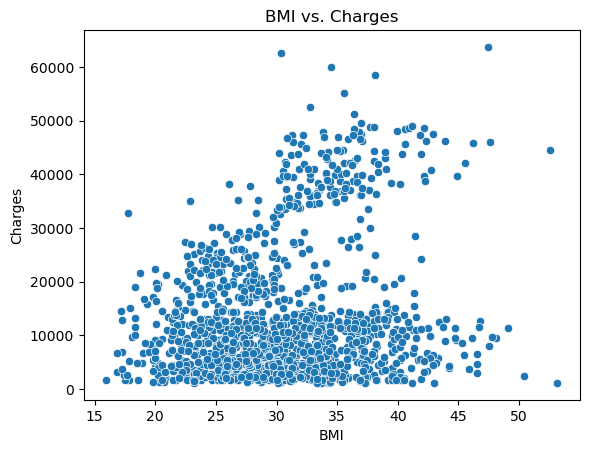

In [16]:
# Scatterplot for Age vs. Charges
sns.scatterplot(data=df_insurance, x='BMI', y='Charges')
plt.title('BMI vs. Charges')
plt.show()

There is a relationship among BMI values. Within the BMI range of 15 to 20, a strong negative correlation is observed, with data points tightly clustered and minimal spacing between them. In the BMI range from 20 to 40, there is a robust relationship, as data points are closely scattered. In the range of 40 to 45, the relationship remains but is moderately strong, with some data points tightly clustered and others with slightly more spacing. Beyond a BMI of 45, the scatter plot reveals data points that are widely apart from each other, indicating a weak relationship between BMI and charges.

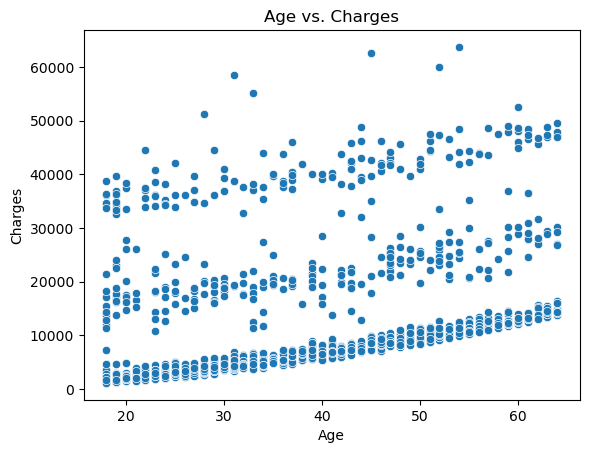

In [17]:
# Scatterplot for S vs. Charges
sns.scatterplot(data=df_insurance, x='Age', y='Charges')
plt.title('Age vs. Charges')
plt.show()

The visualization illustrates a strong relationship between charges and age, indicating that as individuals age, thier healthcare costs increase. For example, at 20 years of age, charges are minimal or zero, but by the time an individual reaches the age of 60, charges rise to 10000.

3. Pairplot for the entire data set. Comment on the distribution of the variables and mark variables you'd like to explore further with an explanatory of why?

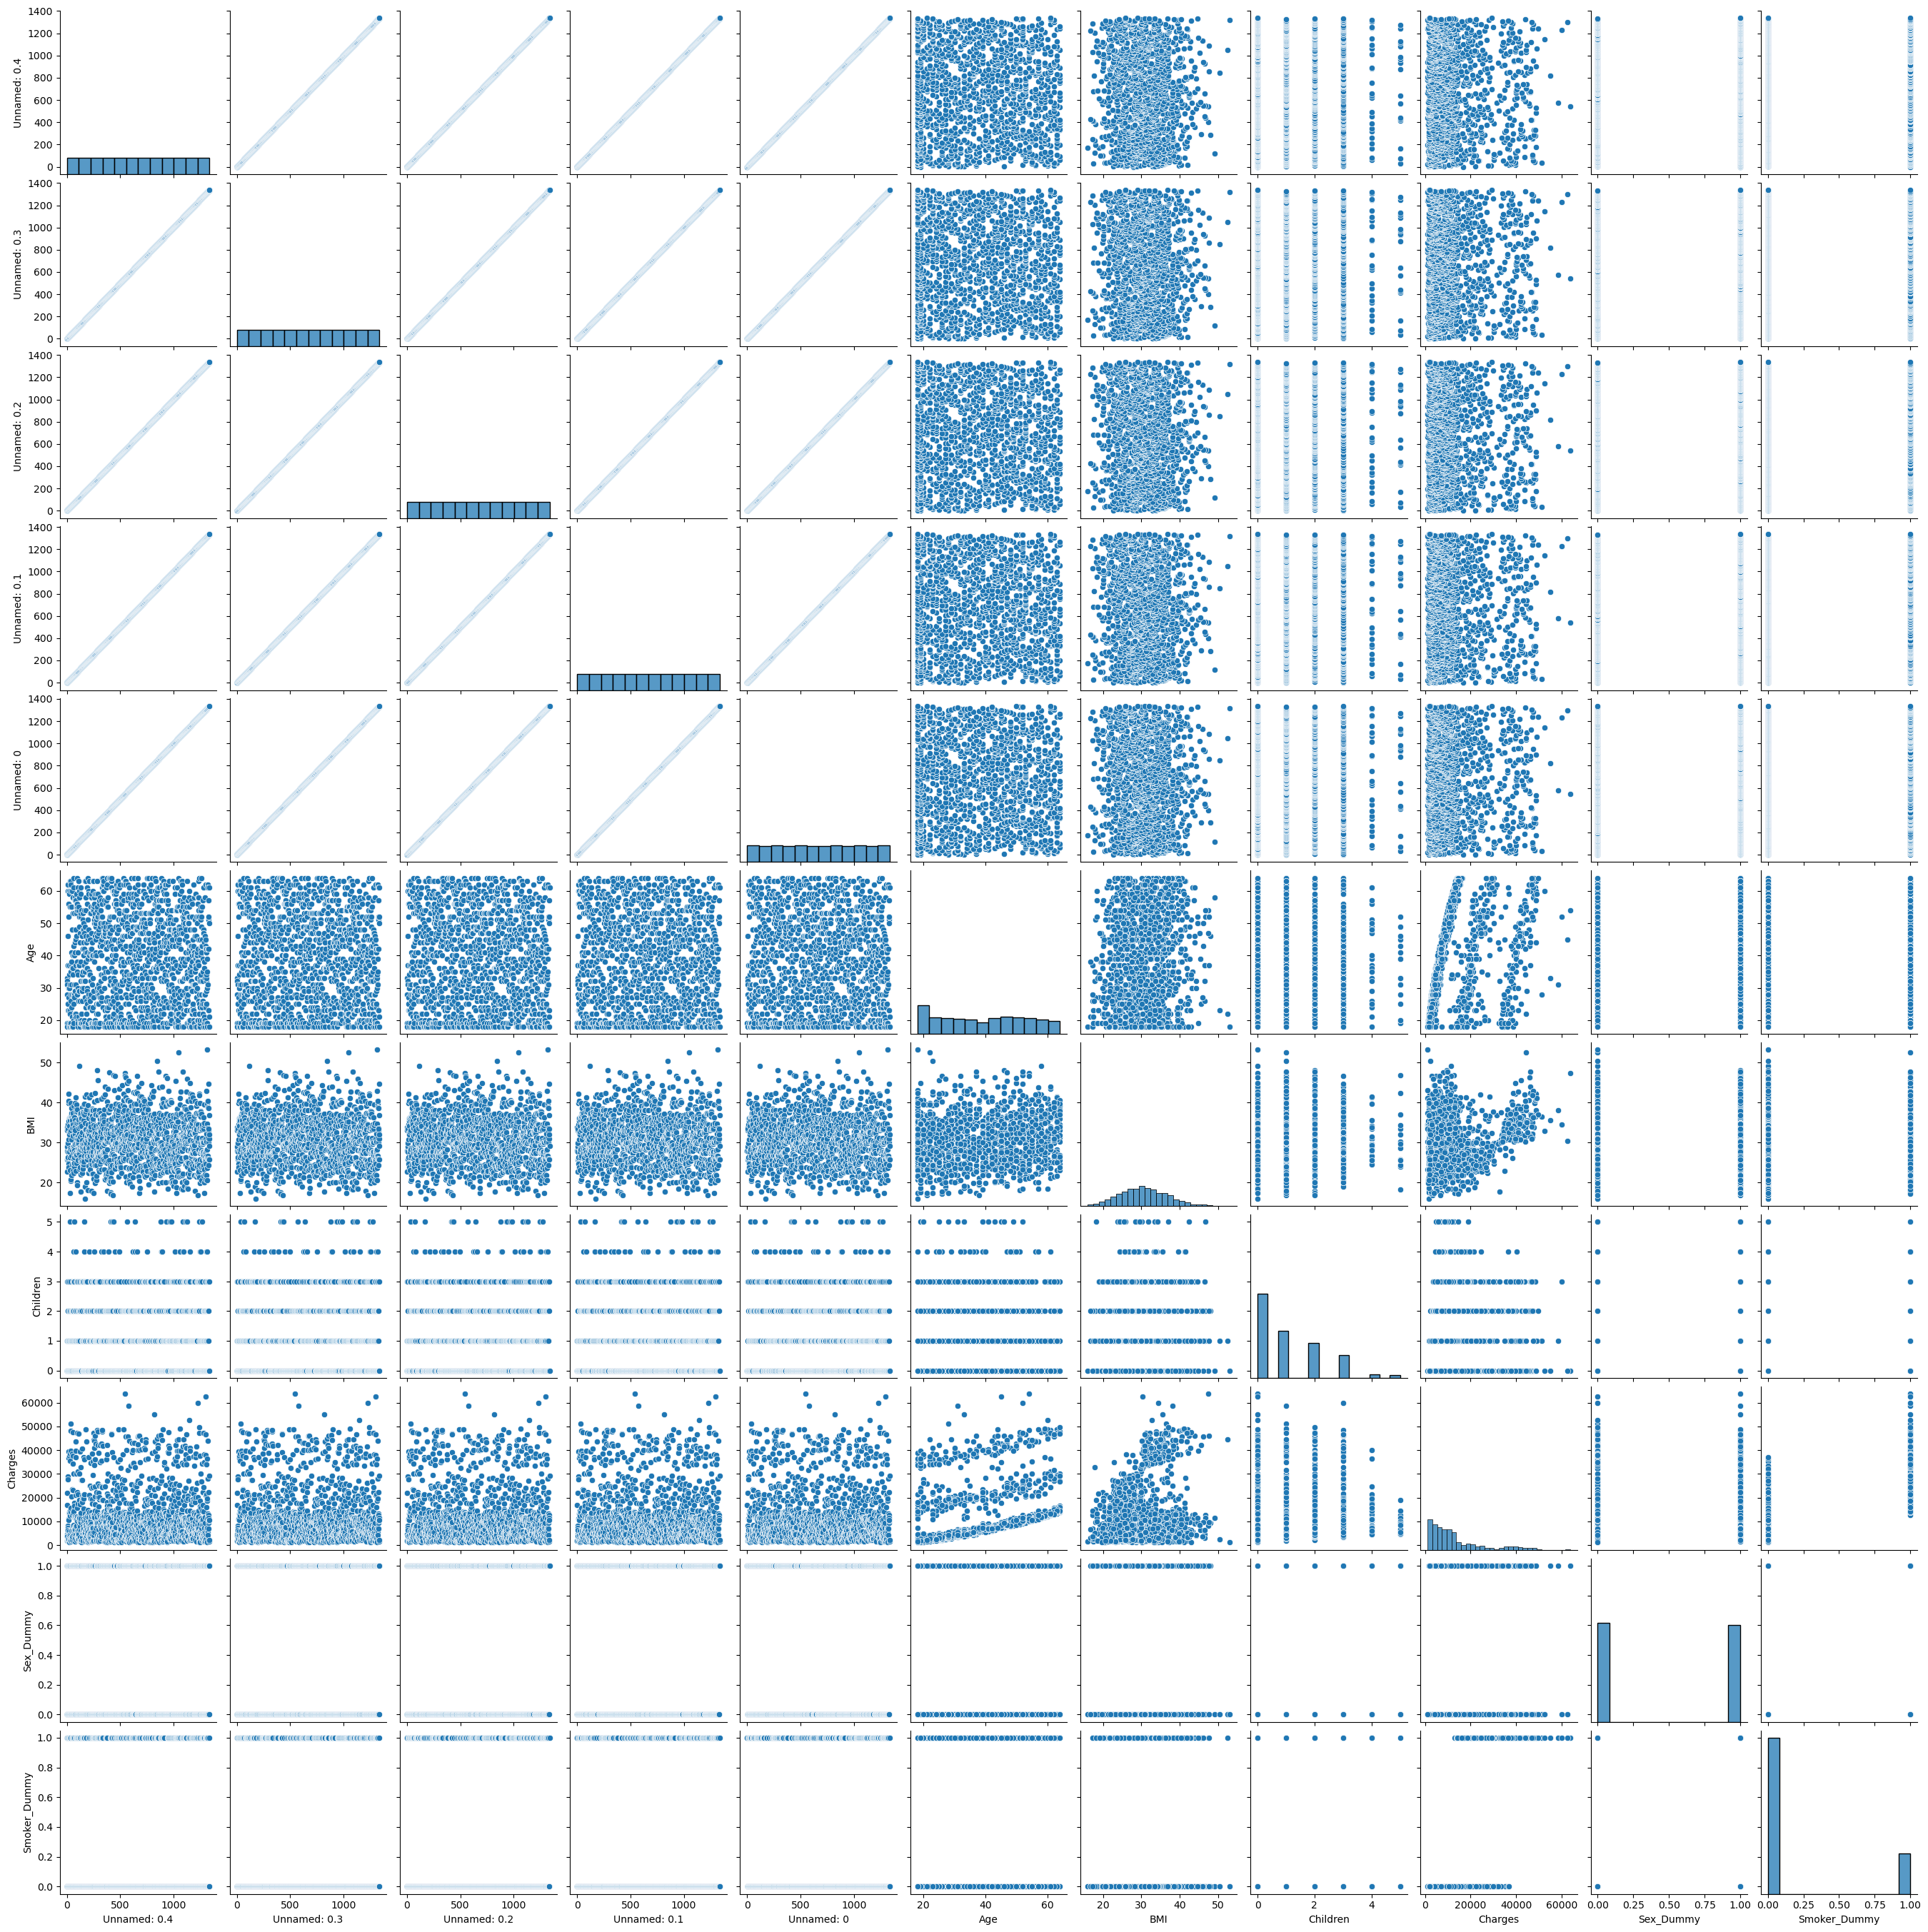

In [18]:
# Create pairplot
sns.pairplot(df_insurance)
plt.show()

Similar to the scatterplot, the data reveals that a significant number of individuals with a BMI between 20 and 40 exhibit charges exceeding 30,000. Both BMI and charges demonstrate a substantial group of individuals with high BMI and high charges. However, the data does not provide clear insights into the influence of smoking status and the number of children. To delve deeper into these factors, I will explore the variables BMI (Body Mass Index), the number of children, and smoking status using regression:

BMI (Body Mass Index):
BMI serves as a widely recognized indicator of a person's body weight relative to their height.
Exploring BMI is crucial as it can be a significant predictor of healthcare costs. Higher BMI is often associated with increased healthcare expenses due to obesity-related health issues.
Our goal is to investigate whether there's a predictive relationship between BMI and medical charges.

Children:
The number of children covered by health insurance can also play a substantial role in healthcare costs.
Analyzing the relationship between the number of children and charges is valuable. Having more children might lead to higher healthcare costs due to extended family coverage.
Smoking Status:

Smokers:
Smoking status is another key factor with the potential to significantly impact healthcare costs. Smokers tend to have higher healthcare expenses due to smoking-related health issues.
It's essential to analyze the effect of smoking status on charges to understand its contribution to overall cost predictions.
Exploring these variables through predictive models will provide a better understanding of their individual and potential combined effects on healthcare charges. This analysis will enable us to quantify the most influential factors in predicting medical costs, aligning with the primary objective of my project.

Regression models will help me understand the relationship between the independent variables (BMI, children, smoking status) and the continuous target variable (Charges), allowing me to make predictions about future healthcare costs based on these factors."

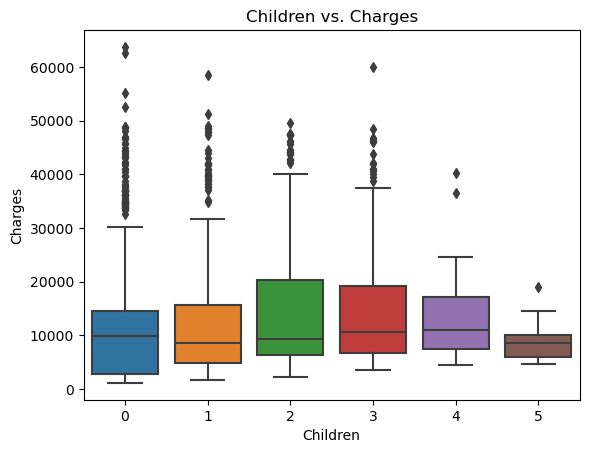

In [19]:
# Box plot for Children vs. Charges
sns.boxplot(data=df_insurance, x='Children', y='Charges')
plt.title('Children vs. Charges')
plt.show()


4. Create a categorical plot of the entire data set:
Analyze BMI categories:
Divide the dataset into BMI categories and create a histogram:

In [20]:
# Create BMI categories
bmi_categories = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']
bmi_bins = [0, 18.5, 24.9, 29.9, df_insurance['BMI'].max()]
df_insurance['BMI Category'] = pd.cut(df_insurance['BMI'], bins=bmi_bins, labels=bmi_categories)


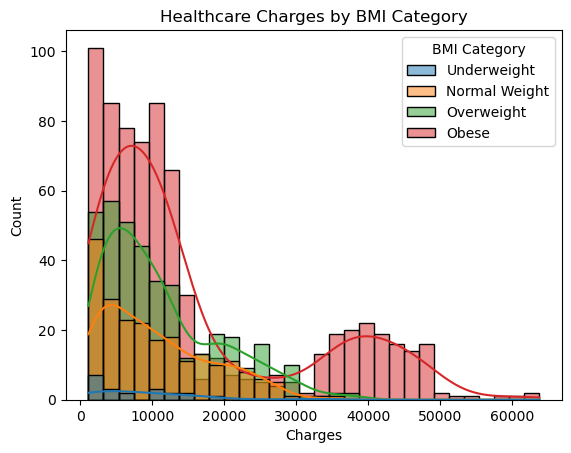

In [21]:

# Histogram for BMI categories
sns.histplot(data=df_insurance, x='Charges', hue='BMI Category', kde=True)
plt.title('Healthcare Charges by BMI Category')
plt.show()

Create a categorical plot:

Underweight - low charges
Normal weight - Middle charges
Overwight - Middle charges
Obese -High charges

Interprent the results:
Underweight (Low Charges): Individuals categorized as "underweight" tend to have lower healthcare charges. This could be because they are generally healthier and have fewer medical issues that require expensive treatment.

Normal Weight (Middle Charges): Individuals with a "normal weight" fall into a middle range of healthcare charges. They are not among the lowest spenders but also not incurring the highest charges. This indicates a moderate level of healthcare expenses for this group.

Overweight (Middle Charges): Those classified as "overweight" also have healthcare charges in the middle range. While their charges are not as low as underweight individuals, they are not incurring the highest charges either.

Obese (High Charges): Individuals categorized as "obese" tend to have higher healthcare charges. This group experiences a significant increase in healthcare costs.

Obese - Large Bump in Charges (35000 to 50000): Within the "obese" category, there is a notable concentration of individuals with healthcare charges ranging from 35,000 to 50,000. This suggests that there is a substantial increase in healthcare costs within this specific range for obese individuals, which might be attributed to obesity-related health issues.


In [22]:
df_insurance

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Age,Sex,BMI,Children,Smoker,Region,Charges,Sex_Dummy,Smoker_Dummy,BMI Category
0,0,0,0,0,0,19,female,27.900,0,yes,southwest,16884.92400,1,1,Overweight
1,1,1,1,1,1,18,male,33.770,1,no,southeast,1725.55230,0,0,Obese
2,2,2,2,2,2,28,male,33.000,3,no,southeast,4449.46200,0,0,Obese
3,3,3,3,3,3,33,male,22.705,0,no,northwest,21984.47061,0,0,Normal Weight
4,4,4,4,4,4,32,male,28.880,0,no,northwest,3866.85520,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1333,1333,1333,1333,1333,50,male,30.970,3,no,northwest,10600.54830,0,0,Obese
1334,1334,1334,1334,1334,1334,18,female,31.920,0,no,northeast,2205.98080,1,0,Obese
1335,1335,1335,1335,1335,1335,18,female,36.850,0,no,southeast,1629.83350,1,0,Obese
1336,1336,1336,1336,1336,1336,21,female,25.800,0,no,southwest,2007.94500,1,0,Overweight


In [23]:
df_insurance.to_csv(os.path.join(path,'Healthcare Clean Data',' Clean Data','Geographical.csv'))

In [85]:
df_insurance.to_excel(path+"output.xlsx", sheet_name='Sheet1')  